# SMS Spam Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3026,ham,You still at the game?,NaN,NaN,NaN
1931,ham,What pa tell me.. I went to bath:-),NaN,NaN,NaN
5289,ham,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,NaN,NaN,NaN
1413,spam,Dear U've been invited to XCHAT. This is our f...,NaN,NaN,NaN
1416,ham,No..few hours before.went to hair cut .,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

**Now lets start working with the data and make some amazing conclusions**

## 1. Data Cleaning
## 2. EDA
## 3. Data Preprocessing --vectorization,stemming,remove stop words
## 4. Model Building
## 5. Evaluate the model
## 6. Improve the model
## 7. Website
## 8. Deployment on Heroku


# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# the above information shows that columns 2 3 4 have too much null values so it is good to drop it
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
#inplace= True because we permanently want to bring change in the original dataset
df.sample(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
604,ham,Meet after lunch la...
1633,ham,Yesterday its with me only . Now am going home.
4702,ham,Mmmmmmm *snuggles into you* ...*deep contented...
1561,ham,Dnt worry...use ice pieces in a cloth pack.als...


In [7]:
# as the column names are not to descriptive lets rename the names of the columns
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [8]:
df.sample(5)

,message_type,message
3448,ham,Sorry. || mail? ||
4020,ham,We have to pick rayan macleran there.
4663,ham,Mum not going robinson already.
3439,ham,What time you thinkin of goin?
4329,ham,i thought we were doing a king of the hill thi...


In [9]:
# in the message type, they are classified as 'ham' and 'spam' but we want it as 1 and O so lets import Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [11]:
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

734     0
3631    0
4672    0
2388    0
3158    0
Name: message_type, dtype: int32

In [12]:
df[df['message_type']==1]
# there are 747 spam messages in the dataset

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [13]:
#now lets check the missing values
df.isnull().sum()
# there are no missing values

message_type    0
message         0
dtype: int64

In [14]:
# now lets check for duplicated values
df.duplicated().sum()


403

*There are 403 duplicate values so we simply have to remove those values* 

In [15]:
#remove the duplicates
df= df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.05, random_state=42)

In [18]:
df_train.to_csv('spam_train.csv')
df_test.to_csv('spam_test.csv')

# 2. Exploratory Data Analysis

### *Lets visualize this classification problem to get a better understanding of the data*

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df_train['message_type'].value_counts()

message_type
0    4299
1     611
Name: count, dtype: int64

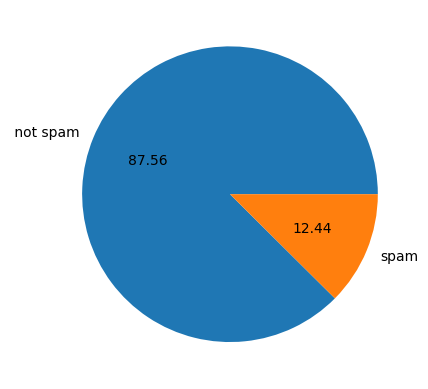

In [21]:
plt.pie(df_train['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

### there is imbalance in data

In [22]:
# no. of alphabets in the data
# no. of sentences in the data
# no. of words in the data

### *Now lets make 3 new columns in the data depicting the no. of characters,words and sentences*

In [23]:
#natural language tool kit
import nltk

In [24]:
#find the number of alpha numeric characters in the messages column
df_train['num_characters']=df_train['message'].apply(len)
df_train.head()

,message_type,message,num_characters
1207,0,I need you to be in my strong arms...,37
5122,0,\NOT ENUFCREDEIT TOCALL.SHALL ILEAVE UNI AT 6 ...,73
3416,0,But i haf enuff space got like 4 mb...,38
3516,0,So you think i should actually talk to him? No...,287
258,1,We tried to contact you re your reply to our o...,154


In [25]:
#fetch number of words using NLTK
from nltk.tokenize import word_tokenize
#word tokenization
df_train['message'].apply(lambda x: nltk.word_tokenize(x))

1207    [I, need, you, to, be, in, my, strong, arms, ...]
5122    [\NOT, ENUFCREDEIT, TOCALL.SHALL, ILEAVE, UNI,...
3416    [But, i, haf, enuff, space, got, like, 4, mb, ...
3516    [So, you, think, i, should, actually, talk, to...
258     [We, tried, to, contact, you, re, your, reply,...
                              ...                        
4740    [Many, more, happy, returns, of, the, day, ., ...
474     [Nice, line, said, by, a, broken, heart-, Plz,...
3266        [Ok, then, i, come, n, pick, u, at, engin, ?]
4016    [Eek, that, 's, a, lot, of, time, especially, ...
879     [U, have, a, Secret, Admirer, who, is, looking...
Name: message, Length: 4910, dtype: object

In [26]:
#now find the length of each of the list to get the total number of words in each list
df_train['num_words']=df_train['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df_train.sample(5)

,message_type,message,num_characters,num_words
2905,0,"Helloooo... Wake up..! \Sweet\"" \""morning\"" \""...",125,44
3362,0,Can... I'm free...,18,6
341,0,I take it the post has come then! You must hav...,151,35
820,0,Good afternoon starshine! How's my boytoy? Doe...,131,32
253,0,"Ups which is 3days also, and the shipping comp...",179,40


In [27]:
#finding number of sentences
df_train['num_sentences']=df_train['message'].apply(lambda x: nltk.sent_tokenize(x))
df_train.sample(5)

,message_type,message,num_characters,num_words,num_sentences
3269,0,K actually can you guys meet me at the sunoco ...,86,20,[K actually can you guys meet me at the sunoco...
2116,0,"It's that time of the week again, ryan",38,10,"[It's that time of the week again, ryan]"
823,1,25p 4 alfie Moon's Children in need song on ur...,161,36,[25p 4 alfie Moon's Children in need song on u...
4386,0,S.i'm watching it in live..,27,7,[S.i'm watching it in live..]
1444,0,Those ducking chinchillas,25,3,[Those ducking chinchillas]


In [28]:
#finding no. of sentences
df_train['num_sentences']=df_train['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df_train.sample(5)

,message_type,message,num_characters,num_words,num_sentences
4481,0,What do u reckon as need 2 arrange transport i...,69,17,1
2824,1,Congratulations - Thanks to a good friend U ha...,158,31,4
1377,1,Double Mins & Double Txt & 1/2 price Linerenta...,159,26,3
5120,1,PRIVATE! Your 2003 Account Statement for 078,44,8,2
621,0,Good words.... But words may leave u in dismay...,58,13,2


In [29]:
#lets test the describe function on the new 3 columns
df_train[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4910.000000,4910.000000,4910.000000
mean,78.887576,18.439104,1.958452
std,58.576083,13.402153,1.445522
min,3.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### For 'ham' messages

In [30]:
# lets check describe() for both ham and spam individually
df_train[df_train['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4299.000000,4299.000000,4299.000000
mean,70.502675,17.123750,1.815771
std,56.799785,13.573646,1.380251
min,3.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,89.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### For 'spam' messages

In [31]:
df_train[df_train['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,611.000000,611.000000,611.000000
mean,137.883797,27.693944,2.962357
std,29.983896,7.023586,1.496517
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000



#### we can clearly see the spam messages are quite longer than the ham messages

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

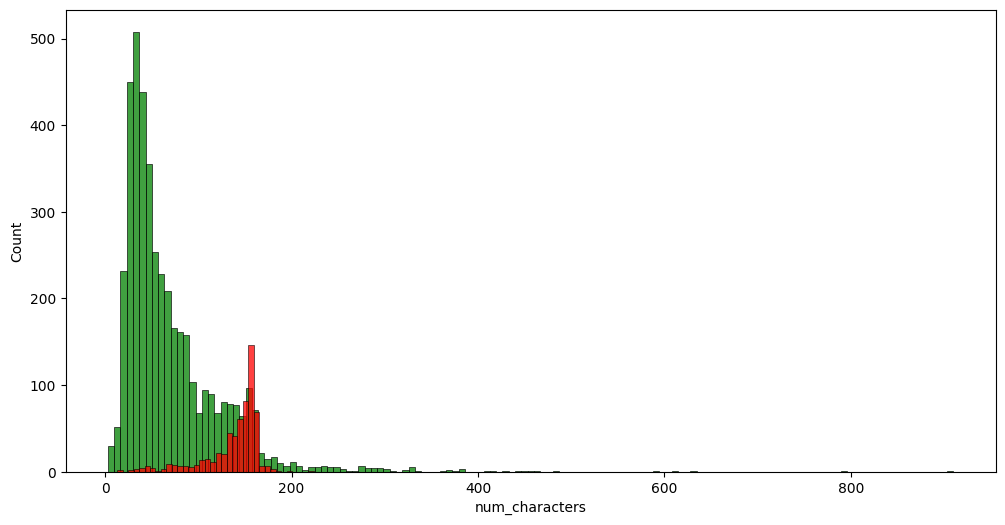

In [32]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df_train[df_train['message_type']==0]['num_characters'],color='green')
sns.histplot(df_train[df_train['message_type']==1]['num_characters'],color = 'red')


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

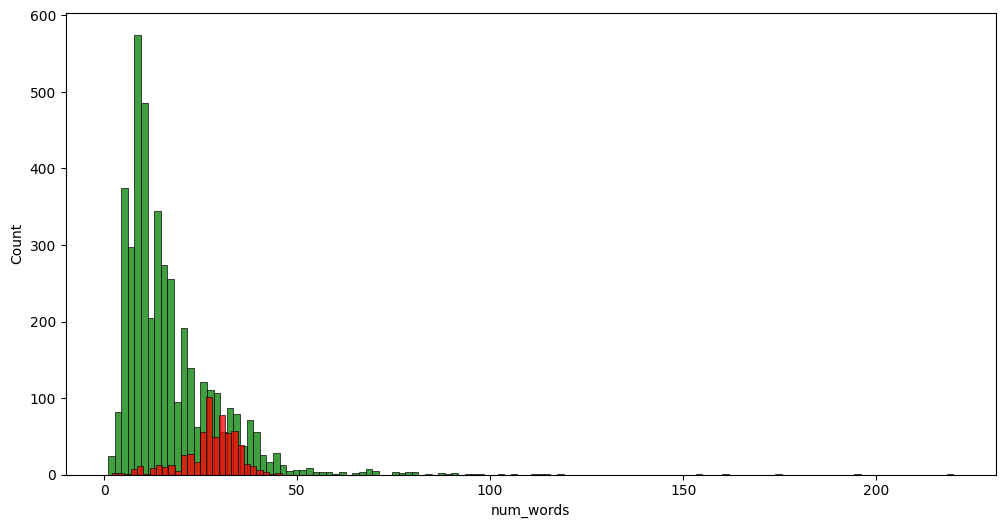

In [33]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df_train[df_train['message_type']==0]['num_words'],color='green')
sns.histplot(df_train[df_train['message_type']==1]['num_words'],color='red')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-p

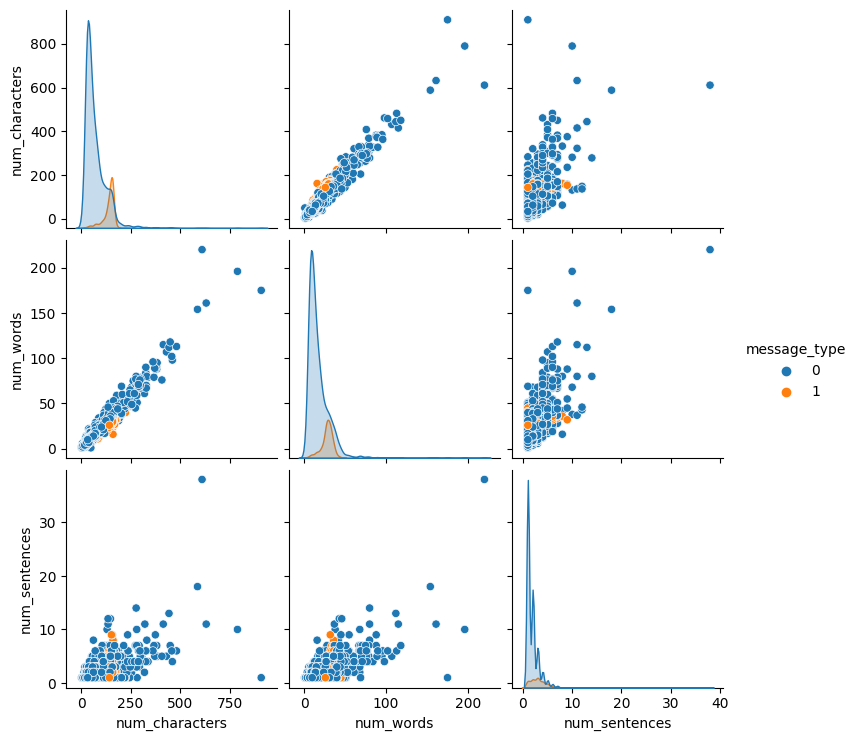

In [34]:
#plot pairplots for ham and spam
sns.pairplot(df_train,hue='message_type')

In [35]:
df_corr = df_train.drop(columns=['message'])
df_corr

,message_type,num_characters,num_words,num_sentences
1207,0,37,10,1
5122,0,73,17,1
3416,0,38,10,1
3516,0,287,66,4
258,1,154,31,5
...,...,...,...,...
4740,0,62,14,2
474,0,125,31,1
3266,0,33,10,1
4016,0,103,24,2


In [36]:
#find correlation
df_corr.corr()

,message_type,num_characters,num_words,num_sentences
message_type,1.000000,0.379739,0.260361,0.261848
num_characters,0.379739,1.000000,0.966159,0.624542
num_words,0.260361,0.966159,1.000000,0.681954
num_sentences,0.261848,0.624542,0.681954,1.000000


<Axes: >

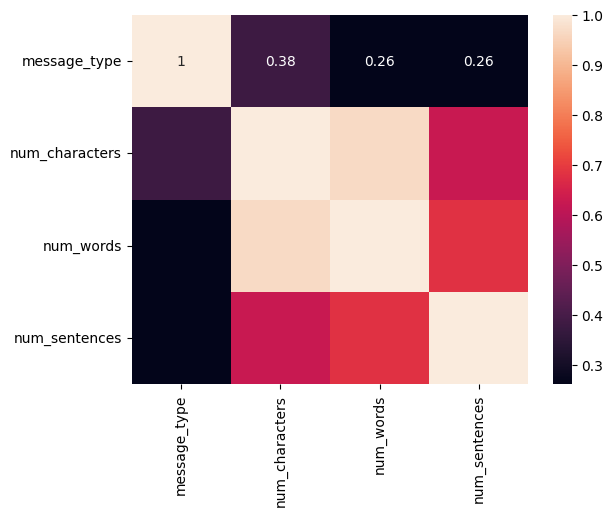

In [37]:
#plotting a heatmap for the correlation
sns.heatmap(df_corr.corr(),annot=True)

*As we see multicollinearity here, we cannot use all three columns instead we shall use only one and that should be mun_characters has it has highest correlation with message_type*

# 3. Data Preprocessing

### 3.1 LowerCase
### 3.2 Tokenisation
### 3.3 Removing special characters
### 3.4 Removing stop words and punctuation
### 3.5 Stemming --lemmetization

In [38]:
## Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) #length of stopwords available


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

*This shows there are 179 stopwords in the english language in this library*

In [39]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [41]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)#tokenization  and after that text is converted to a list
    #so we run a loop in the message text
    y=[] #creating empty list to append
    for i in message:
        if i.isalnum():
            y.append(i)
    #now lets assign the y list back to the message
    #message = y   !!!!list can never be copied this way it is immutable data type so we have to do it by CLONING
    message=y[:]
    y.clear() #now y is cleared
    
    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    ##now stemming function
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)#returns in the form of string

In [42]:
text_transform("THis is a SMS spam CLassifier playing,wasn't $3000") ##see here the special character $ is ignored , no stopwords and no punctuation

'sm spam classifi play 3000'

## Now lets apply the *text_transform* function to all the messages in the dataset

In [43]:
df_train['message'].apply(text_transform)

1207                                      need strong arm
5122                  enufcredeit ileav uni 6 bu yor hous
3416                        haf enuff space got like 4 mb
3516    think actual talk call boss morn went place la...
258     tri contact repli offer video handset 750 anyt...
                              ...                        
4740            mani happi return day wish happi birthday
474     nice line said broken plz cum 1 time infront w...
3266                               ok come n pick u engin
4016    eek lot time especi sinc american pie like 8 m...
879     u secret admir look 2 make contact r reveal th...
Name: message, Length: 4910, dtype: object

In [44]:
df_train['transformed_msg']=df_train['message'].apply(text_transform)

In [45]:
df_train.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
1207,0,I need you to be in my strong arms...,37,10,1,need strong arm
5122,0,\NOT ENUFCREDEIT TOCALL.SHALL ILEAVE UNI AT 6 ...,73,17,1,enufcredeit ileav uni 6 bu yor hous
3416,0,But i haf enuff space got like 4 mb...,38,10,1,haf enuff space got like 4 mb
3516,0,So you think i should actually talk to him? No...,287,66,4,think actual talk call boss morn went place la...
258,1,We tried to contact you re your reply to our o...,154,31,5,tri contact repli offer video handset 750 anyt...


### *Now we have to work basically on 2 columns the "transformed_msg" and "message_type"*

# Word Cloud

In [46]:
#drawing a word cloud of maximum occuring words in the messages
from wordcloud import WordCloud
#create its object
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
##word cloud for SPAM
spam_wc=wc.generate(df_train[df_train['message_type']==1]['transformed_msg'].str.cat(sep=""))

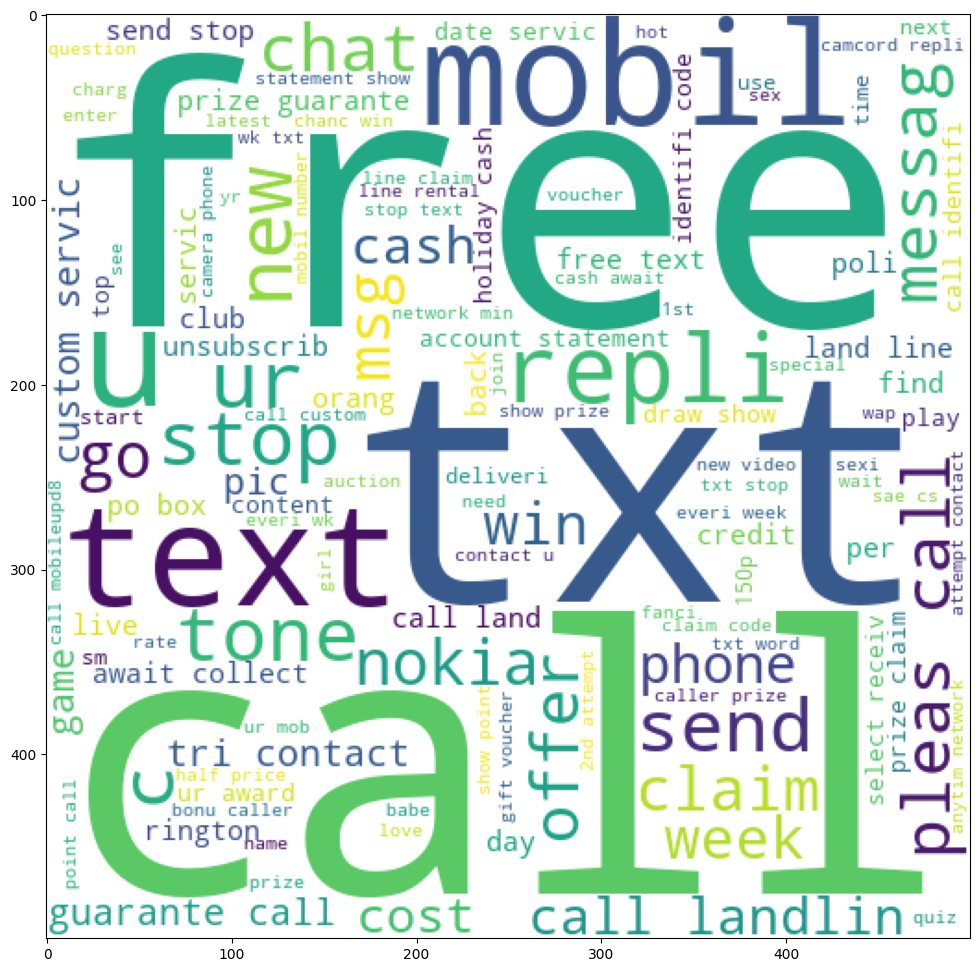

In [48]:
#display the word cloud---SPAM
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

In [49]:
## word cloud for ham messages
ham_wc=wc.generate(df_train[df_train['message_type']==0]['transformed_msg'].str.cat(sep=" "))

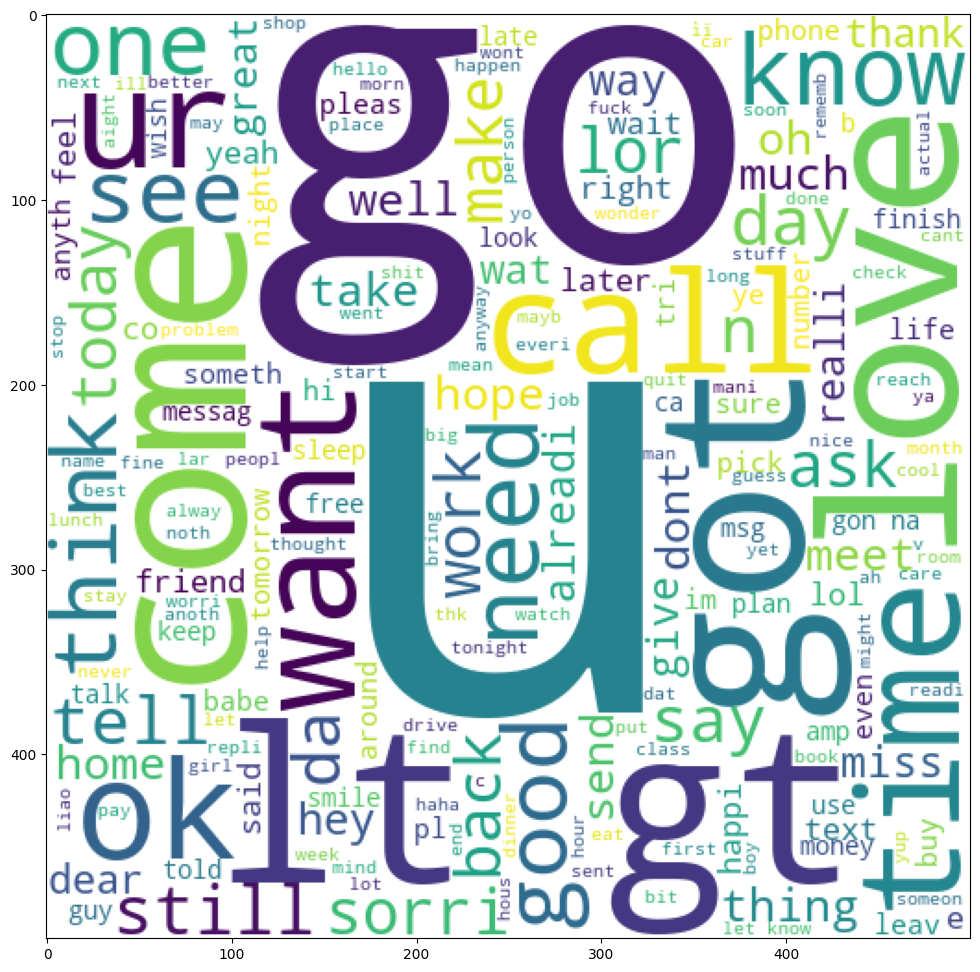

In [50]:
#show the wordcloud for ham messages
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)


### Lets find the top 30 words used in Ham and Spam

In [51]:
##finding the top 30 words used in Ham and spam
##lets write a custom code for this
df_train[df_train['message_type']==1]['transformed_msg'].tolist()


['tri contact repli offer video handset 750 anytim network min unlimit text camcord repli call 08000930705',
 'eastend tv quiz flower dot compar violet tulip lili txt e f 84025 4 chanc 2 win cash',
 'sunshin quiz win super soni dvd record cannam capit australia text mquiz b',
 'b4u voucher marsm log onto discount credit opt repli stop custom care call 08717168528',
 'privat 2003 account statement 07808 xxxxxx show 800 point call 08719899217 identifi code 41685 expir',
 'want 750 anytim network min 150 text new video phone five pound per week call 08000776320 repli deliveri tomorrow',
 'link pictur sent also use http',
 'want 2 get laid tonight want real dog locat sent direct 2 ur mob join uk largest dog network txting moan 69888nyt ec2a 150p',
 'ur hmv quiz current maxim ur send hmv1 86688',
 'hi sexychat girl wait text text great night chat send stop stop servic',
 'u get 2 phone wan na chat 2 set meet call 09096102316 u cum 2moro luv jane xx',
 'text meet someon sexi today u find dat

In [52]:
##Lets print all the spam messages
spam_corpus=[]
for msg in df_train[df_train['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
       
   

In [53]:
len(spam_corpus)

9313

In [54]:
## now lets find the most occuring words
from collections import Counter
Counter(spam_corpus)

Counter({'call': 297,
         'free': 179,
         '2': 146,
         'txt': 132,
         'text': 115,
         'ur': 113,
         'mobil': 103,
         'u': 102,
         'repli': 98,
         'stop': 98,
         '4': 90,
         'claim': 87,
         'prize': 74,
         'get': 72,
         'servic': 63,
         'new': 60,
         'send': 60,
         'urgent': 56,
         'tone': 56,
         'phone': 51,
         'nokia': 51,
         'contact': 50,
         'award': 50,
         'cash': 47,
         'pleas': 47,
         'win': 44,
         'c': 44,
         'min': 43,
         'week': 43,
         'collect': 43,
         'messag': 42,
         'guarante': 41,
         'custom': 39,
         'per': 38,
         'chat': 37,
         'tri': 35,
         'number': 35,
         'cs': 34,
         'msg': 33,
         'offer': 32,
         'line': 32,
         'show': 31,
         'today': 31,
         'draw': 31,
         'go': 30,
         'landlin': 30,
         'want': 29

In [55]:
#Top 30 
Counter(spam_corpus).most_common(30)

[('call', 297),
 ('free', 179),
 ('2', 146),
 ('txt', 132),
 ('text', 115),
 ('ur', 113),
 ('mobil', 103),
 ('u', 102),
 ('repli', 98),
 ('stop', 98),
 ('4', 90),
 ('claim', 87),
 ('prize', 74),
 ('get', 72),
 ('servic', 63),
 ('new', 60),
 ('send', 60),
 ('urgent', 56),
 ('tone', 56),
 ('phone', 51),
 ('nokia', 51),
 ('contact', 50),
 ('award', 50),
 ('cash', 47),
 ('pleas', 47),
 ('win', 44),
 ('c', 44),
 ('min', 43),
 ('week', 43),
 ('collect', 43)]

In [56]:
#Add those 30 words in one dataframe
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,297
1,free,179
2,2,146
3,txt,132
4,text,115
5,ur,113
6,mobil,103
7,u,102
8,repli,98
9,stop,98


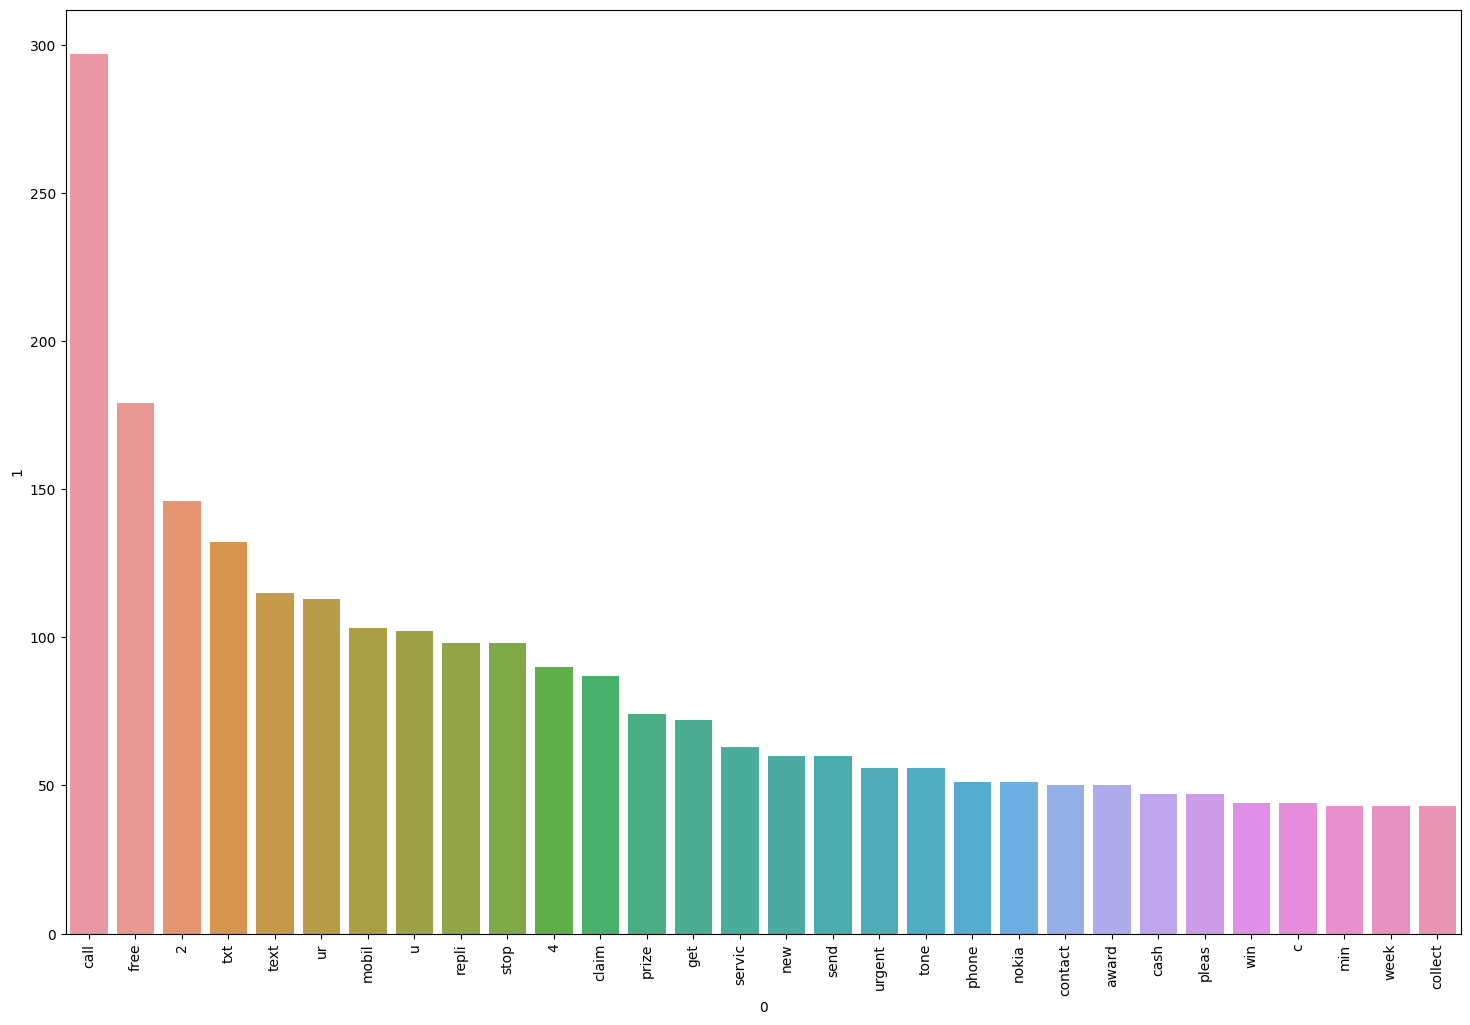

In [57]:
##plot the barplt
plt.figure(figsize=(18,12))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [58]:
# Find top 30 words for HAM
ham_corpus=[]
for msg in df_train[df_train['message_type']==0]['transformed_msg']:
    for word in msg.split():
        ham_corpus.append(word)


In [59]:
Counter(ham_corpus).most_common(30)

[('u', 832),
 ('go', 378),
 ('get', 336),
 ('gt', 279),
 ('lt', 277),
 ('2', 267),
 ('come', 261),
 ('know', 228),
 ('got', 227),
 ('like', 218),
 ('call', 218),
 ('time', 209),
 ('love', 203),
 ('good', 203),
 ('ok', 202),
 ('want', 199),
 ('day', 184),
 ('ur', 183),
 ('need', 160),
 ('one', 155),
 ('lor', 148),
 ('home', 147),
 ('4', 142),
 ('think', 142),
 ('see', 142),
 ('still', 139),
 ('take', 135),
 ('da', 130),
 ('tell', 127),
 ('back', 123)]

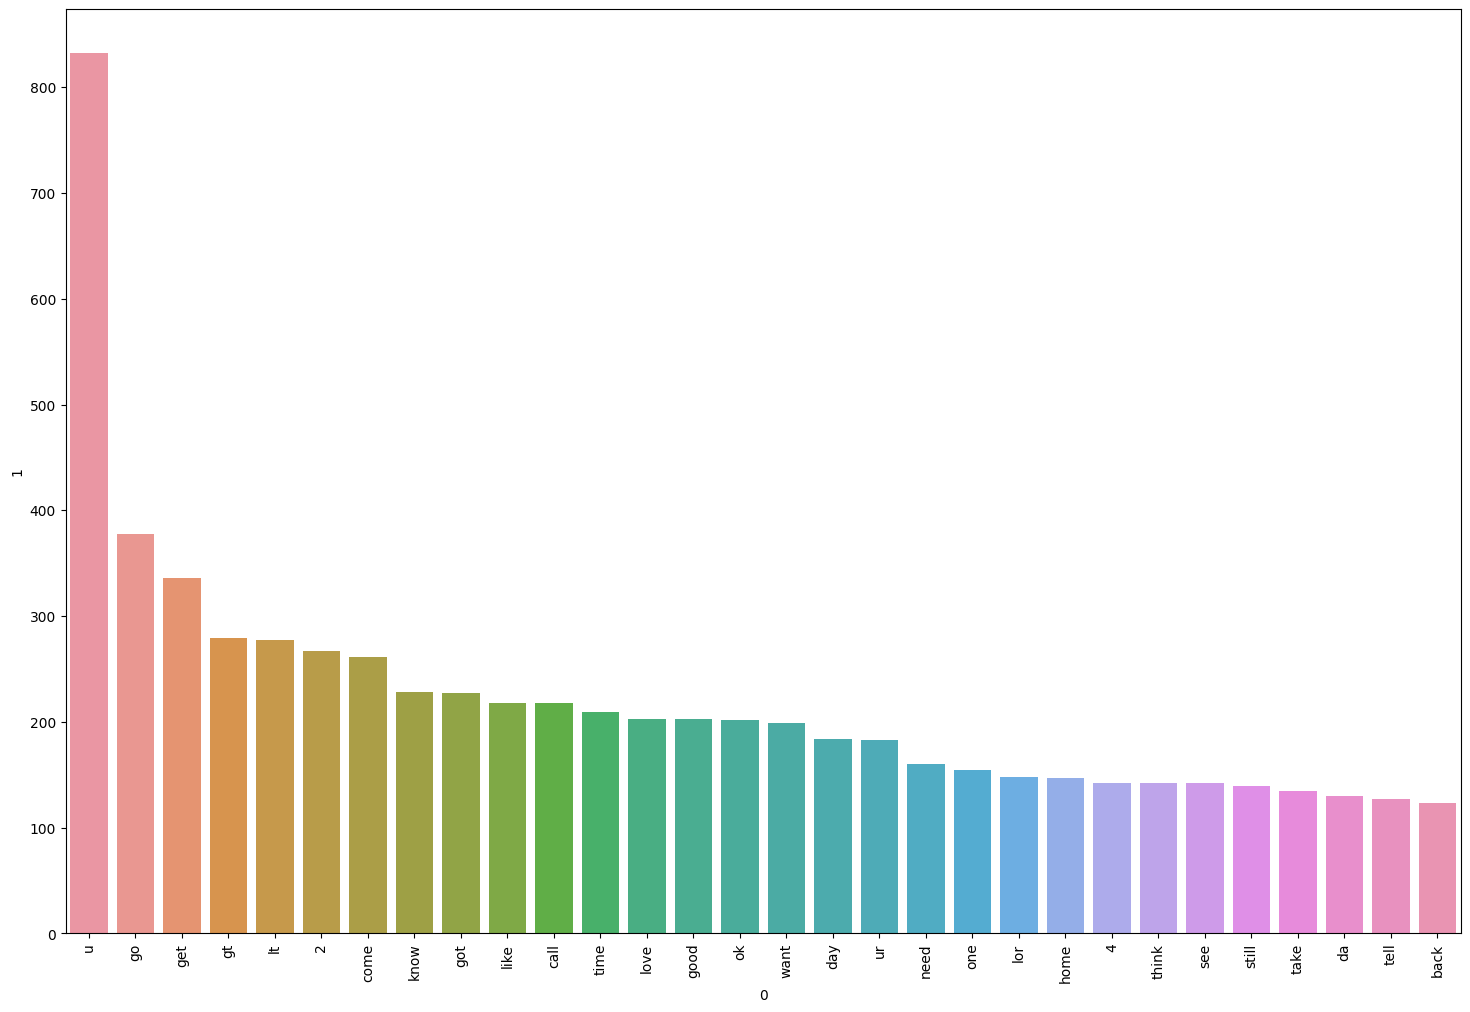

In [60]:
plt.figure(figsize=(18,12))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

**As it known that on Textual Data Naive Bayes Algorithm works the best hence we will use it but along the way also compare it with different algorithms**

*Input is categorical*
*Output is Numerical*

**but as we know in Naive bayes algorithm the input columns should be numerical so we have to convert(VECTORIZE) the column**

### How to vectorize:
* Bag of Words
* TFIDF
* Word2vec

## Here we will be using BAG OF WORDS

In [61]:
##Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [62]:
## toarray to convert from sparse array to dense array
X=cv.fit_transform(df_train['transformed_msg']).toarray()

In [63]:
X.shape

(4910, 6522)

*5169 SMS 6629 words*

In [64]:
y=df_train['message_type'].values

***Now we'll do TRAIN TEST SPLIT***

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


Accuracy score of Gaussian NB is:  0.8645621181262729
Confusion Matrix of Guassian NB is:  [[742 113]
 [ 20 107]]
Precision score of the Gaussian NB is 0.4863636363636364


**we want to reduce false postives as it is a high precision model**


In [70]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))




Accuracy score of Multinomial NB is:  0.9684317718940937
Confusion Matrix of Multinomial NB is:  [[838  17]
 [ 14 113]]
Precision score of the Multinomial NB is 0.8692307692307693


In [71]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))



Accuracy score of Bernoulli NB is:  0.9653767820773931
Confusion Matrix of Bernoulli NB is:  [[851   4]
 [ 30  97]]
Precision score of the Bernoulli NB is 0.9603960396039604


**This is an imbalanced data so precision score matters the most**

## Lets try with TFID Vectorizer

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf= TfidfVectorizer(max_features=3000)

### Done for Model Improvement--> Scaling

In [74]:
X=tfidf.fit_transform(df_train['transformed_msg']).toarray()

In [75]:
X.shape

(4910, 3000)

In [76]:
y=df_train['message_type'].values

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [80]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


Accuracy score of Gaussian NB is:  0.8625254582484725
Confusion Matrix of Guassian NB is:  [[742 113]
 [ 22 105]]
Precision score of the Gaussian NB is 0.481651376146789


In [81]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))


Accuracy score of Multinomial NB is:  0.9663951120162932
Confusion Matrix of Multinomial NB is:  [[854   1]
 [ 32  95]]
Precision score of the Multinomial NB is 0.9895833333333334


**Here precision is 1 which is very good as there will be no FALSE POSITIVE**

In [82]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))


Accuracy score of Bernoulli NB is:  0.9735234215885947
Confusion Matrix of Bernoulli NB is:  [[853   2]
 [ 24 103]]
Precision score of the Bernoulli NB is 0.9809523809523809


## We are chosing MNB with TFIDF

### *Lets compare other classification algorithms with MNB*

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
#Creating objects of every algorithm
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [85]:
# create a dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [86]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [87]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9674134419551935, 0.9439252336448598)

In [88]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9674134419551935
Precision -  0.9439252336448598
For  KN
Accuracy -  0.8991853360488798
Precision -  1.0
For  NB
Accuracy -  0.9663951120162932
Precision -  0.9895833333333334
For  DT
Accuracy -  0.9409368635437881
Precision -  0.8709677419354839
For  LR
Accuracy -  0.9490835030549898
Precision -  0.8969072164948454
For  RF
Accuracy -  0.9735234215885947
Precision -  1.0


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9592668024439919
Precision -  0.9306930693069307
For  BgC
Accuracy -  0.960285132382892
Precision -  0.8859649122807017
For  ETC
Accuracy -  0.9684317718940937
Precision -  0.9897959183673469
For  GBDT
Accuracy -  0.9470468431771895
Precision -  0.9629629629629629
For  xgb
Accuracy -  0.9674134419551935
Precision -  0.9439252336448598


In [89]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [90]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.899185,1.000000
5,RF,0.973523,1.000000
8,ETC,0.968432,0.989796
2,NB,0.966395,0.989583
9,GBDT,0.947047,0.962963
0,SVC,0.967413,0.943925
10,xgb,0.967413,0.943925
6,AdaBoost,0.959267,0.930693
4,LR,0.949084,0.896907
7,BgC,0.960285,0.885965


In [91]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [92]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.899185
1,RF,Accuracy,0.973523
2,ETC,Accuracy,0.968432
3,NB,Accuracy,0.966395
4,GBDT,Accuracy,0.947047
5,SVC,Accuracy,0.967413
6,xgb,Accuracy,0.967413
7,AdaBoost,Accuracy,0.959267
8,LR,Accuracy,0.949084
9,BgC,Accuracy,0.960285


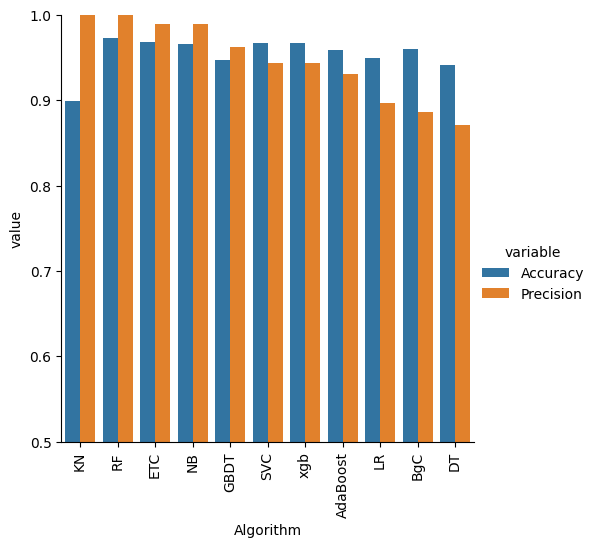

In [93]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 5. Model Improvement

### 5.1 Change the parameter *max_features* in TFIDF
### 5.2 

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [96]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [97]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [99]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.899185,1.000000,0.899185,1.000000,0.899185,1.000000,0.899185,1.000000
1,RF,0.973523,1.000000,0.973523,1.000000,0.973523,1.000000,0.973523,1.000000
2,ETC,0.968432,0.989796,0.968432,0.989796,0.968432,0.989796,0.968432,0.989796
3,NB,0.966395,0.989583,0.966395,0.989583,0.966395,0.989583,0.966395,0.989583
4,GBDT,0.947047,0.962963,0.947047,0.962963,0.947047,0.962963,0.947047,0.962963
5,SVC,0.967413,0.943925,0.967413,0.943925,0.967413,0.943925,0.967413,0.943925
6,xgb,0.967413,0.943925,0.967413,0.943925,0.967413,0.943925,0.967413,0.943925
7,AdaBoost,0.959267,0.930693,0.959267,0.930693,0.959267,0.930693,0.959267,0.930693
8,LR,0.949084,0.896907,0.949084,0.896907,0.949084,0.896907,0.949084,0.896907
9,BgC,0.960285,0.885965,0.960285,0.885965,0.960285,0.885965,0.960285,0.885965


In [100]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
#wb --> write binary
pickle.dump(mnb,open('model.pkl','wb'))